In [3]:
import tsai
import pandas as pd
from tsai.all import *
print('tsai       :', tsai.__version__)
print('fastai     :', fastai.__version__)
print('fastcore   :', fastcore.__version__)
print('torch      :', torch.__version__)

tsai       : 0.2.16
fastai     : 2.2.7
fastcore   : 1.3.19
torch      : 1.7.0+cu110


In [4]:
X, y, splits = get_regression_data('AppliancesEnergy', split_data=False)
X.shape, y.shape, y[:10]
splits

((#95) [0,1,2,3,4,5,6,7,8,9...], (#42) [95,96,97,98,99,100,101,102,103,104...])

In [9]:
X.shape

(137, 24, 144)

In [6]:
type(X), type(y), type(splits[0])

(numpy.memmap, numpy.memmap, fastcore.foundation.L)

X      - shape: [137 samples x 24 features x 144 timesteps]  type: memmap  dtype:float64  isnan: 0
y      - shape: (137,)  type: memmap  dtype:float64  isnan: 0
splits - n_splits: 2 shape: [95, 42]  overlap: [False]


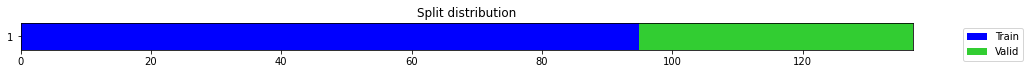

In [31]:
check_data(X, y, splits)

In [10]:
tfms  = [None, [TSRegression()]]
batch_tfms = TSStandardize(by_sample=True, by_var=True)
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms, bs=128)
dls.one_batch()

(TSTensor(samples:95, vars:24, len:144),
 tensor([11.6300, 12.9800,  5.3800, 20.7400, 19.2200, 14.8000, 16.2500, 16.2200,
         13.3700, 16.0500, 11.6400, 17.6600, 26.2800, 11.2300, 11.0600, 11.4900,
         12.6800, 16.7700, 11.3200, 10.8200, 22.1000, 16.0200, 11.5300, 13.2500,
         17.5300,  9.6000, 12.0300,  7.0300, 14.7100, 18.5600, 11.9300, 11.5400,
         14.8200, 12.0700, 14.6100, 16.5300,  9.6300, 13.8700, 18.1800, 10.5100,
         19.0100, 21.7400, 13.6900, 21.6900,  5.3400, 14.9900, 21.9100, 17.3000,
         20.4400, 11.8300, 10.5100,  9.1700, 23.0100, 14.0600, 10.3100, 10.6100,
         12.9700, 21.3100, 10.8000, 19.9400, 10.2500, 22.7400, 10.4600, 14.6200,
         10.9200,  9.9900, 10.1700, 21.4900, 12.7800, 16.4100, 17.0000, 12.7200,
          9.8200, 14.2800, 12.2400, 10.2600, 10.6200, 10.8900, 23.4200,  8.6200,
         15.8900,  8.7500, 10.6300, 13.2100, 12.6800, 13.2900, 15.6800, 13.5600,
         11.9200, 12.5400, 10.1100, 11.4000, 19.3800, 19.6200, 13.10

In [5]:
dls.c

1

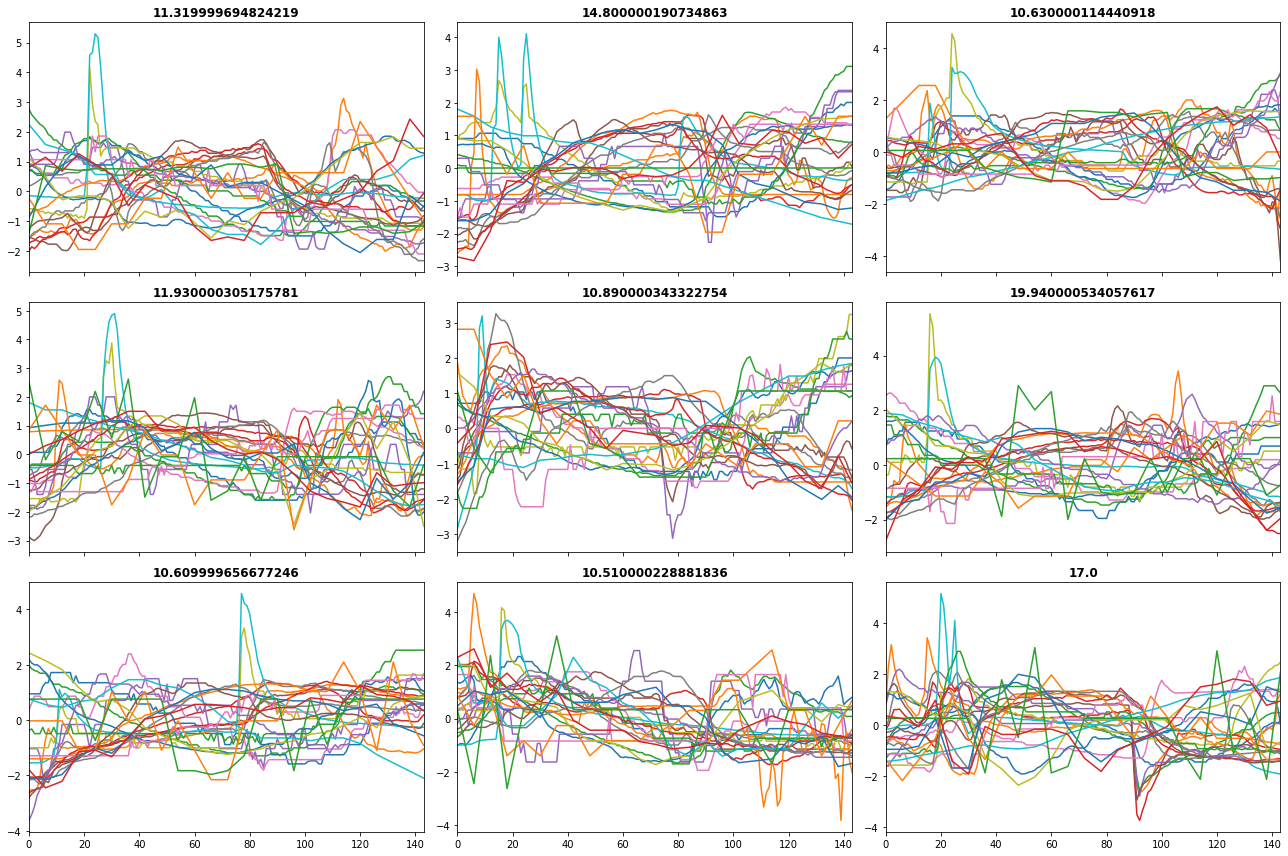

In [11]:
dls.show_batch()

In [17]:
learn = ts_learner(dls, InceptionTime, metrics=[mae, rmse], cbs=ShowGraph())

SuggestedLRs(lr_min=0.33113112449646, lr_steep=0.02290867641568184)

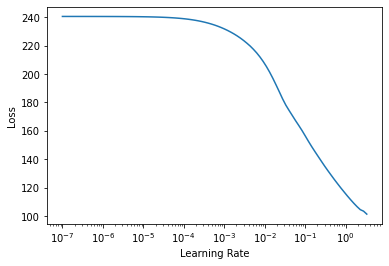

In [18]:
learn.lr_find()

In [14]:
learn.loss_func

FlattenedLoss of MSELoss()

epoch,train_loss,valid_loss,mae,_rmse,time
0,240.458084,210.140259,14.082896,14.496214,00:00
1,237.705475,209.142044,14.047788,14.461744,00:00
2,234.853195,207.758698,13.999143,14.413837,00:00
3,231.433716,205.547195,13.921260,14.336918,00:00
4,227.475754,201.847824,13.791023,14.207314,00:00
5,222.960236,195.909180,13.582206,13.996755,00:00
6,218.027756,192.501709,13.477140,13.874498,00:00
7,213.136444,189.601868,13.400670,13.769599,00:00
8,207.867401,74.014214,8.177191,8.603151,00:00
9,202.053879,64.750290,7.455585,8.046757,00:00


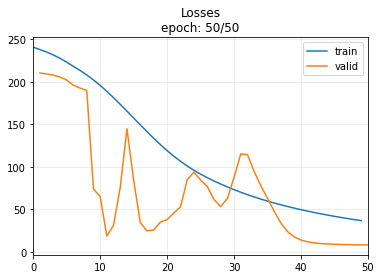

In [19]:
learn.fit_one_cycle(50, 1e-2)

In [23]:
valid_preds, valid_targets = learn.get_preds(ds_idx=1)
valid_preds.flatten().data, valid_targets.data

(tensor([14.5220, 16.5043, 12.0744, 10.5437, 12.0535, 15.7075, 16.6355, 11.9101,
         12.1806, 16.0303, 18.3379, 13.7855,  8.6657, 12.8794, 13.6937, 19.0849,
         14.9515, 13.5343, 11.9613, 13.3193, 14.1261, 14.8578, 12.6912, 12.4182,
         13.7886, 14.3244, 12.3479, 17.7545, 10.9845, 13.3732, 14.5986, 14.9583,
         12.6610, 13.2307, 12.6694, 12.0886,  8.3114, 11.5384, 19.4974, 10.4752,
         14.6283, 10.8073]),
 tensor([17.3700, 20.6500, 11.4200, 10.6800, 12.4400, 11.1700, 24.1200, 10.9900,
         13.7600, 14.5600, 14.9700, 13.4300, 11.5700,  9.3300, 15.5800, 20.9300,
         11.9900, 15.3700, 10.4700, 14.4100, 10.1600, 15.1200, 12.3200, 10.4600,
         15.0600,  9.6800, 10.6900, 17.8000, 10.6900, 17.0600, 20.8800, 10.8900,
         13.4700, 13.6200, 13.4800, 14.8900, 10.6000, 15.5900, 17.8900, 12.9500,
         10.1200, 12.1400]))

In [24]:
import matplotlib.pyplot as plt

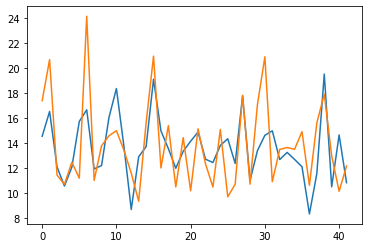

In [30]:
plt.plot(valid_preds.flatten().data)
plt.plot(valid_targets.data)